In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('test-dataset.xlsx')
df.head(3)

,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN


In [44]:
df.columns

Index(['Unnamed: 0', 'household_id', 'total_income', 'union_name', 'user_id',
       'profile_name', 'father_name', 'mother_name', 'birthday', 'age',
       'gender', 'is_poor', 'is_freedom_fighter', 'had_stroke',
       'has_cardiovascular_disease', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP',
       'HEIGHT', 'WEIGHT', 'BMI', 'RESULT_STAT_BMI', 'SUGAR', 'TAG_NAME',
       'RESULT_STAT_SUGAR', 'PULSE_RATE', 'RESULT_STAT_PR', 'SPO2',
       'RESULT_STAT_SPO2', 'MUAC', 'RESULT_STAT_MUAC'],
      dtype='object')

In [45]:
unnecessary_cols = ['Unnamed: 0', 'household_id','union_name','user_id','profile_name', 'father_name', 'mother_name', 'is_freedom_fighter']

df = df.drop(df[unnecessary_cols], axis=1)

In [46]:
df['birth_year'] = pd.to_datetime(df['birthday']).dt.year

In [47]:
df = df.drop('birthday', axis=1)

In [48]:
df.sample(3)

,total_income,age,gender,is_poor,had_stroke,has_cardiovascular_disease,disabilities_name,diabetic,profile_hypertensive,SYSTOLIC,...,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC,birth_year
13746,Lower class,37,Male,0,0,0,0,False,False,125.0,...,NaN,NaN,NaN,96.0,Normal,NaN,NaN,NaN,NaN,1982
24275,Lower-middle class,47,Male,0,0,0,0,False,False,130.0,...,NaN,NaN,NaN,80.0,Normal,NaN,NaN,NaN,NaN,1973
11275,Lower-middle class,59,Male,0,0,0,0,False,False,100.0,...,NaN,NaN,NaN,95.0,Normal,NaN,NaN,NaN,NaN,1961


# Percentage of missing values

In [49]:
df.isna().sum()/df.shape[0]

total_income                  0.000000
age                           0.000000
gender                        0.000000
is_poor                       0.000000
had_stroke                    0.000000
has_cardiovascular_disease    0.000000
disabilities_name             0.000000
diabetic                      0.000000
profile_hypertensive          0.000000
SYSTOLIC                      0.079969
DIASTOLIC                     0.079969
RESULT_STAT_BP                0.079969
HEIGHT                        0.962399
WEIGHT                        0.962399
BMI                           0.962399
RESULT_STAT_BMI               0.962399
SUGAR                         0.947232
TAG_NAME                      0.947232
RESULT_STAT_SUGAR             0.947232
PULSE_RATE                    0.084803
RESULT_STAT_PR                0.084803
SPO2                          0.855162
RESULT_STAT_SPO2              0.855162
MUAC                          0.997533
RESULT_STAT_MUAC              0.997533
birth_year               

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_income                29999 non-null  object 
 1   age                         29999 non-null  int64  
 2   gender                      29999 non-null  object 
 3   is_poor                     29999 non-null  int64  
 4   had_stroke                  29999 non-null  int64  
 5   has_cardiovascular_disease  29999 non-null  int64  
 6   disabilities_name           29999 non-null  object 
 7   diabetic                    29999 non-null  bool   
 8   profile_hypertensive        29999 non-null  bool   
 9   SYSTOLIC                    27600 non-null  float64
 10  DIASTOLIC                   27600 non-null  float64
 11  RESULT_STAT_BP              27600 non-null  object 
 12  HEIGHT                      1128 non-null   float64
 13  WEIGHT                      112

# Cleaning data

In [51]:
df['is_poor'].value_counts()

0    29999
Name: is_poor, dtype: int64

In [52]:
# a column with constant value, doesn't provide any significant information.
# Replace values where total income is stated as lower class.

df['is_poor'] = np.where(df['total_income']=='Lower class', 1, df['is_poor'])

In [53]:
df['disabilities_name'] = df['disabilities_name'].replace('0', 'fit')
df['disabilities_name'].value_counts()

fit         29930
physical       25
eye            17
others         16
mental          7
ear             4
Name: disabilities_name, dtype: int64

In [54]:
df['profile_hypertensive'] = df['profile_hypertensive'].astype(int)
df['profile_hypertensive'].value_counts()

0    28424
1     1575
Name: profile_hypertensive, dtype: int64

In [55]:
df['diabetic'] = df['diabetic'].astype(int)
df['diabetic'].value_counts()

0    29398
1      601
Name: diabetic, dtype: int64

In [56]:
df['RESULT_STAT_BMI'].value_counts()

Normal            612
Overweight        223
Underweight       159
Obesity           102
Highly Obesity     23
Morbid Obesity      9
Name: RESULT_STAT_BMI, dtype: int64

In [57]:
df['RESULT_STAT_SUGAR'].value_counts()

Normal                          749
DIABETIC (need confirmation)    497
High                            178
PRE- DIABETIC                   102
HIGH (Borderline)                39
LOW (Hypoglycemia)               16
Low                               2
Name: RESULT_STAT_SUGAR, dtype: int64

In [58]:
df['RESULT_STAT_PR'].value_counts()

Normal    24435
High       2206
Low         814
Name: RESULT_STAT_PR, dtype: int64

In [59]:
df['RESULT_STAT_SPO2'].value_counts()

Normal      4110
Low          122
Very low     113
Name: RESULT_STAT_SPO2, dtype: int64

In [60]:
df['RESULT_STAT_MUAC'].value_counts()

Nourished              56
Malnutrition           16
Severe Malnutrition     2
Name: RESULT_STAT_MUAC, dtype: int64

# Misaligned Values

In [61]:
df[['age', 'WEIGHT']].loc[df['WEIGHT']<df['WEIGHT'].mean()]

,age,WEIGHT
365,27,23.0
1049,18,40.0
1926,34,45.0
2092,22,48.0
2107,36,45.0
...,...,...
29042,19,50.0
29043,16,49.0
29316,59,50.0
29318,31,50.0


In [62]:
df['HEIGHT'].describe()

count    1128.000000
mean      147.798502
std        22.769384
min        35.560000
25%       137.160000
50%       152.400000
75%       162.560000
max       243.840000
Name: HEIGHT, dtype: float64

In [63]:
df[['age','HEIGHT','WEIGHT','BMI','RESULT_STAT_BMI']].loc[df['HEIGHT']>200]

,age,HEIGHT,WEIGHT,BMI,RESULT_STAT_BMI
6773,3,220.98,14.0,2.866963,Underweight
18267,30,243.84,40.0,6.727444,Underweight
18313,38,200.66,80.0,19.868651,Normal
21087,40,223.52,64.0,12.809943,Underweight


In [64]:
df = df.drop(df[(df['HEIGHT']>200) & (df['age']<10)].index)

### Error readings

In [65]:
df[['age','HEIGHT','WEIGHT','BMI','RESULT_STAT_BMI']].loc[(df['WEIGHT']<10) & (df['age']>10)]

,age,HEIGHT,WEIGHT,BMI,RESULT_STAT_BMI
29664,49,177.8,5.0,1.581636,Underweight


In [66]:
df = df.drop(df[(df['WEIGHT']<10) & (df['age']>10)].index)

# Missing Value treatment

In [67]:
for col in df:
    if df[col].dtypes == object:
        df[col] = df[col].fillna(df[col].mode()[0]) # replaced the null categorical values with modes
    elif df[col].dtypes == float:
        df[col] = df[col].fillna(df[col].mean())    # replaced the null float values with mean
        
df.isnull().sum()

total_income                  0
age                           0
gender                        0
is_poor                       0
had_stroke                    0
has_cardiovascular_disease    0
disabilities_name             0
diabetic                      0
profile_hypertensive          0
SYSTOLIC                      0
DIASTOLIC                     0
RESULT_STAT_BP                0
HEIGHT                        0
WEIGHT                        0
BMI                           0
RESULT_STAT_BMI               0
SUGAR                         0
TAG_NAME                      0
RESULT_STAT_SUGAR             0
PULSE_RATE                    0
RESULT_STAT_PR                0
SPO2                          0
RESULT_STAT_SPO2              0
MUAC                          0
RESULT_STAT_MUAC              0
birth_year                    0
dtype: int64

# Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

for col in df:
    le = LabelEncoder()
    if df[col].dtypes == object:
        df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 0 to 29998
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_income                29997 non-null  int32  
 1   age                         29997 non-null  int64  
 2   gender                      29997 non-null  int32  
 3   is_poor                     29997 non-null  int64  
 4   had_stroke                  29997 non-null  int64  
 5   has_cardiovascular_disease  29997 non-null  int64  
 6   disabilities_name           29997 non-null  int32  
 7   diabetic                    29997 non-null  int32  
 8   profile_hypertensive        29997 non-null  int32  
 9   SYSTOLIC                    29997 non-null  float64
 10  DIASTOLIC                   29997 non-null  float64
 11  RESULT_STAT_BP              29997 non-null  int32  
 12  HEIGHT                      29997 non-null  float64
 13  WEIGHT                      299

In [69]:
df.isna().sum()/df.shape[0]

total_income                  0.0
age                           0.0
gender                        0.0
is_poor                       0.0
had_stroke                    0.0
has_cardiovascular_disease    0.0
disabilities_name             0.0
diabetic                      0.0
profile_hypertensive          0.0
SYSTOLIC                      0.0
DIASTOLIC                     0.0
RESULT_STAT_BP                0.0
HEIGHT                        0.0
WEIGHT                        0.0
BMI                           0.0
RESULT_STAT_BMI               0.0
SUGAR                         0.0
TAG_NAME                      0.0
RESULT_STAT_SUGAR             0.0
PULSE_RATE                    0.0
RESULT_STAT_PR                0.0
SPO2                          0.0
RESULT_STAT_SPO2              0.0
MUAC                          0.0
RESULT_STAT_MUAC              0.0
birth_year                    0.0
dtype: float64

In [70]:
df.sample(3)

,total_income,age,gender,is_poor,had_stroke,has_cardiovascular_disease,disabilities_name,diabetic,profile_hypertensive,SYSTOLIC,...,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC,birth_year
18725,0,38,0,1,0,0,2,0,0,107.0,...,9.990543,2,5,90.0,2,97.627657,1,13.585946,1,1982
8346,0,35,0,1,0,0,2,0,0,126.0,...,9.990543,2,5,87.0,2,98.000000,1,13.585946,1,1985
7210,0,38,0,1,0,0,2,0,0,107.0,...,9.990543,2,5,79.0,2,97.627657,1,13.585946,1,1982


# Visualization

<AxesSubplot: xlabel='age', ylabel='SYSTOLIC'>

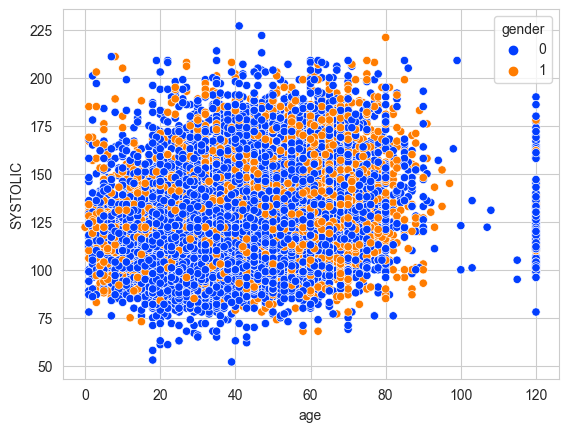

In [71]:
sns.scatterplot(data=df, x='age', y='SYSTOLIC', hue='gender', palette='bright')

<AxesSubplot: xlabel='age', ylabel='SYSTOLIC'>

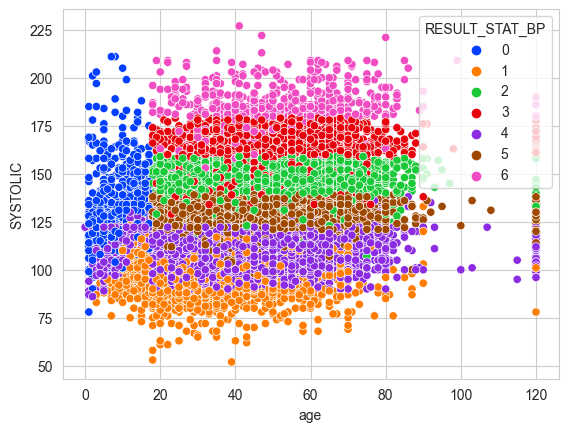

In [72]:
sns.scatterplot(data=df, x='age', y='SYSTOLIC', hue='RESULT_STAT_BP', palette='bright')

<AxesSubplot: xlabel='age', ylabel='DIASTOLIC'>

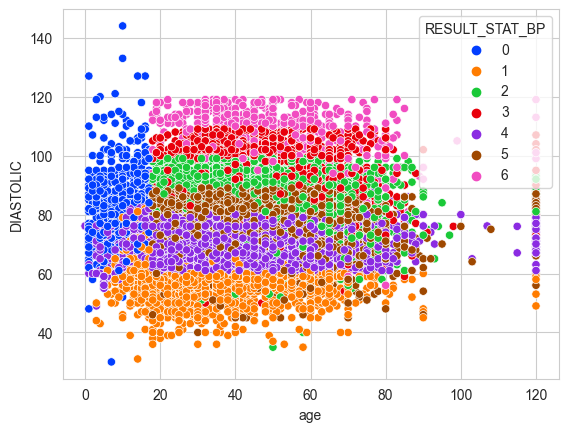

In [73]:
sns.scatterplot(data=df, x='age', y='DIASTOLIC', hue='RESULT_STAT_BP', palette='bright')

# Boxplot for distribution understanding

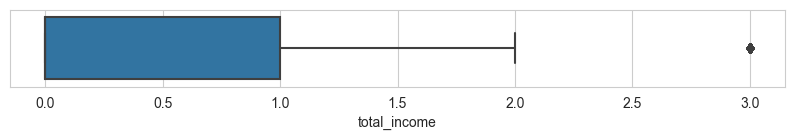

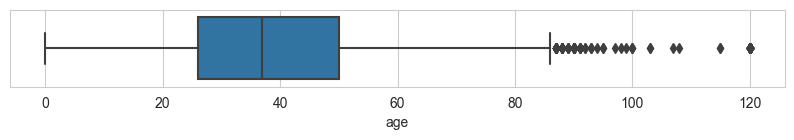

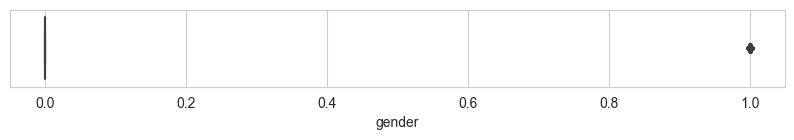

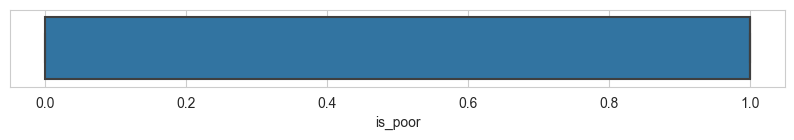

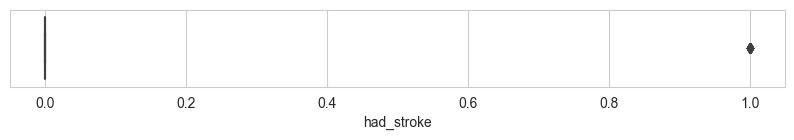

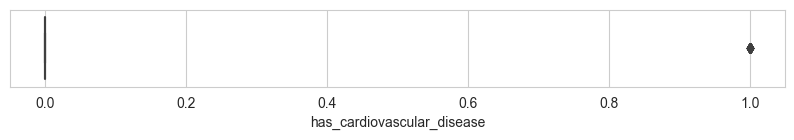

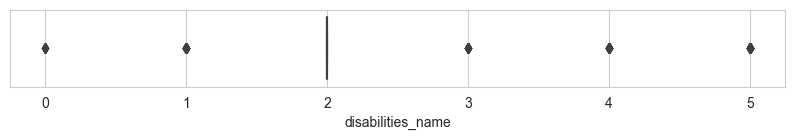

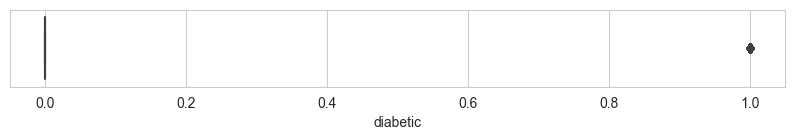

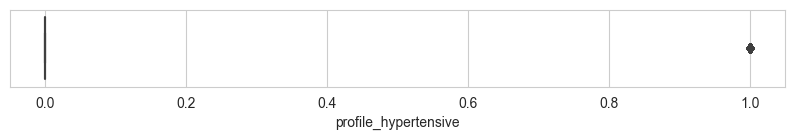

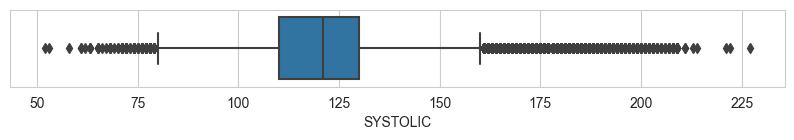

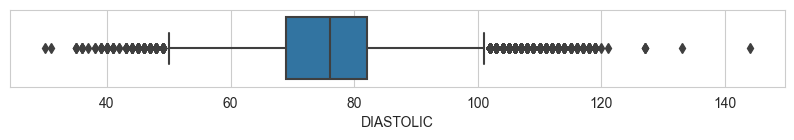

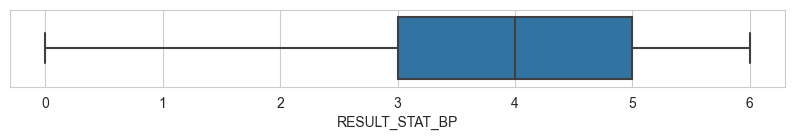

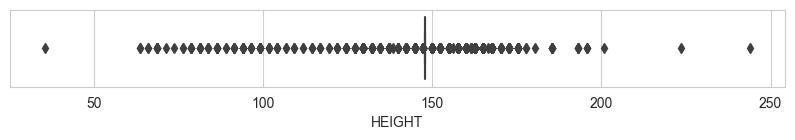

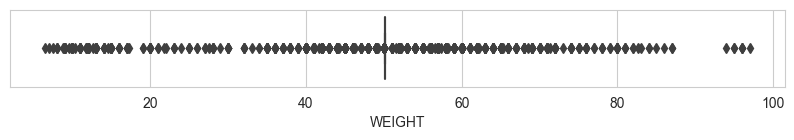

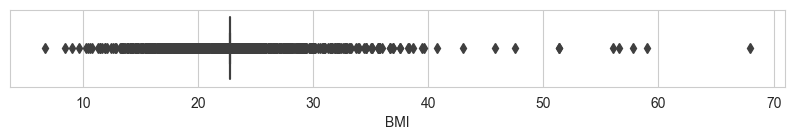

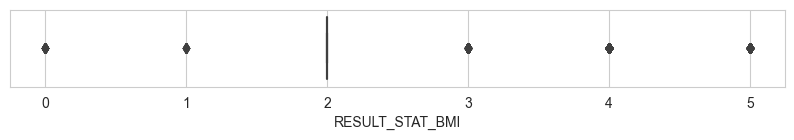

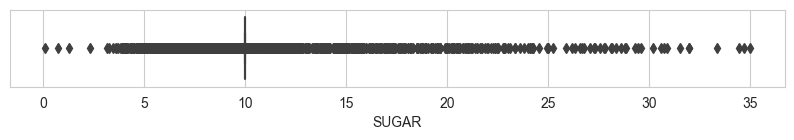

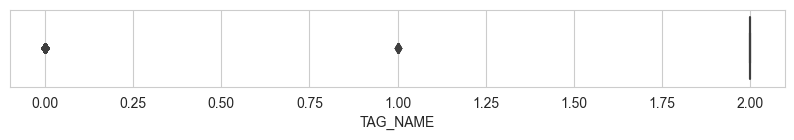

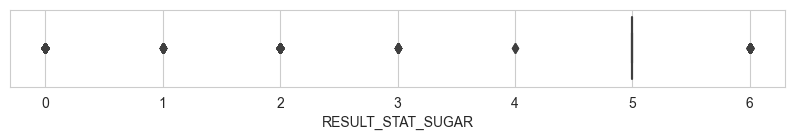

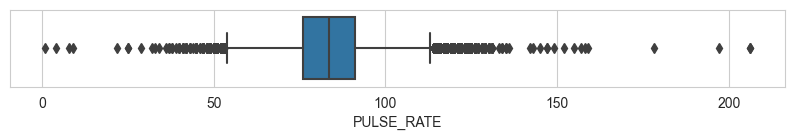

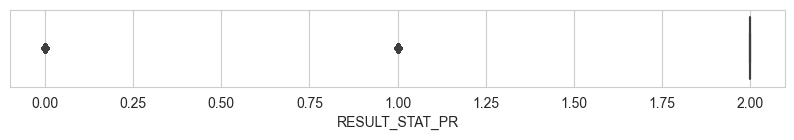

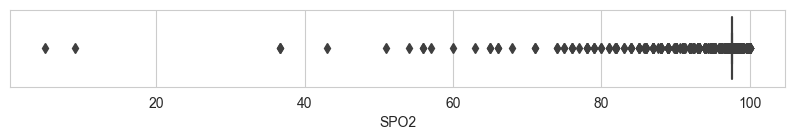

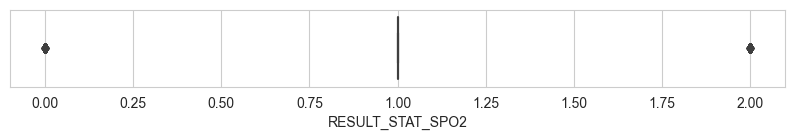

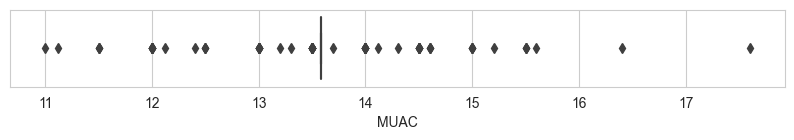

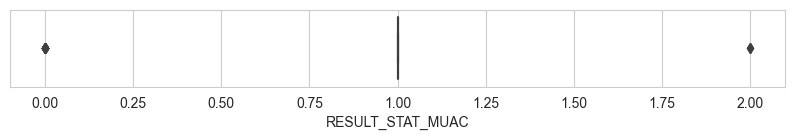

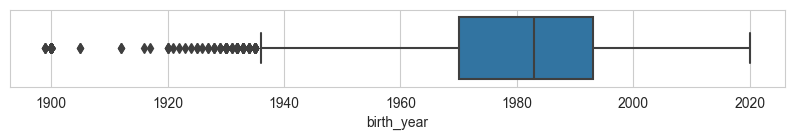

In [74]:
for i in df:
    plt.figure(figsize=(10,1))
    ax = sns.boxplot(data=df, x=i)
    plt.show()

# Correlation Understanding

<AxesSubplot: >

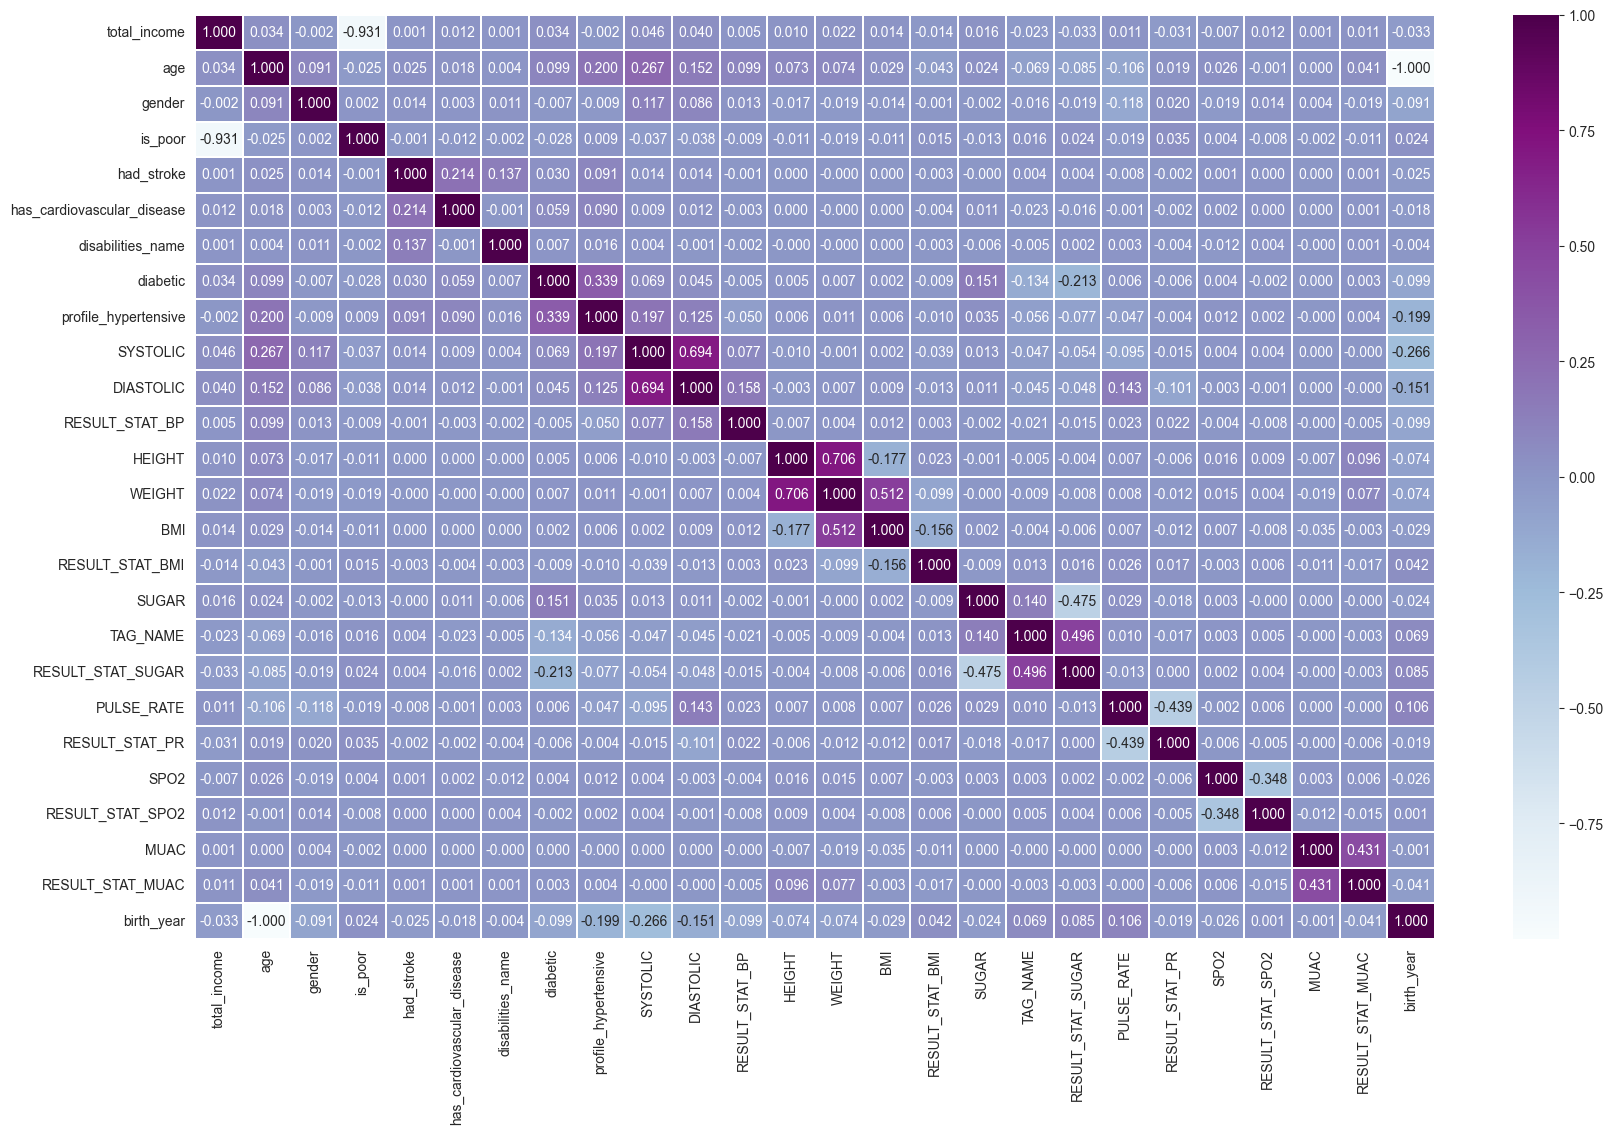

In [75]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=.1, cmap='BuPu')

No features are correlated

# Chi-Square Test

In [76]:
from sklearn.feature_selection import chi2

In [77]:
df.columns

Index(['total_income', 'age', 'gender', 'is_poor', 'had_stroke',
       'has_cardiovascular_disease', 'disabilities_name', 'diabetic',
       'profile_hypertensive', 'SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP',
       'HEIGHT', 'WEIGHT', 'BMI', 'RESULT_STAT_BMI', 'SUGAR', 'TAG_NAME',
       'RESULT_STAT_SUGAR', 'PULSE_RATE', 'RESULT_STAT_PR', 'SPO2',
       'RESULT_STAT_SPO2', 'MUAC', 'RESULT_STAT_MUAC', 'birth_year'],
      dtype='object')

total_income     2.918474e-04
age             1.211408e-202
gender           1.487403e-02
SYSTOLIC         7.719095e-42
DIASTOLIC        1.168177e-02
HEIGHT           3.673175e-84
WEIGHT          1.894861e-138
BMI             4.461278e-274
PULSE_RATE       6.279751e-13
birth_year       3.029440e-03
dtype: float64


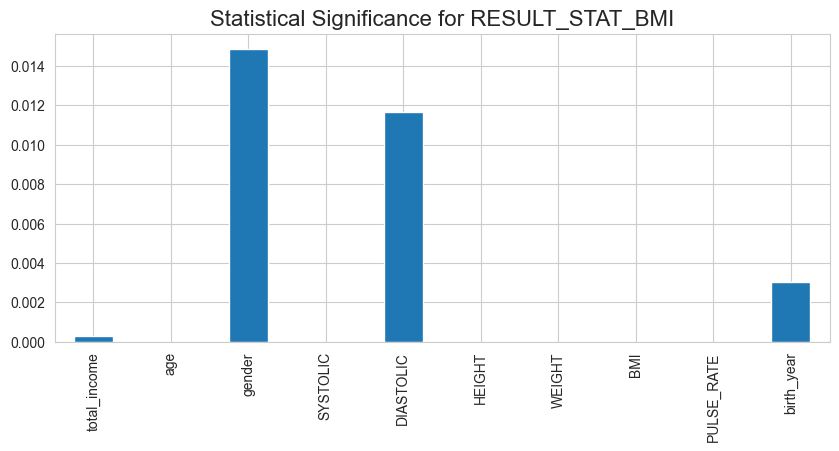

total_income                   7.513345e-20
age                            0.000000e+00
gender                         4.168047e-02
is_poor                        7.406267e-03
has_cardiovascular_disease     1.537292e-22
diabetic                       0.000000e+00
profile_hypertensive          1.712102e-231
SYSTOLIC                       2.422451e-77
DIASTOLIC                      1.574497e-31
SUGAR                          0.000000e+00
TAG_NAME                      8.037857e-120
PULSE_RATE                     6.246850e-03
birth_year                     1.700563e-07
dtype: float64


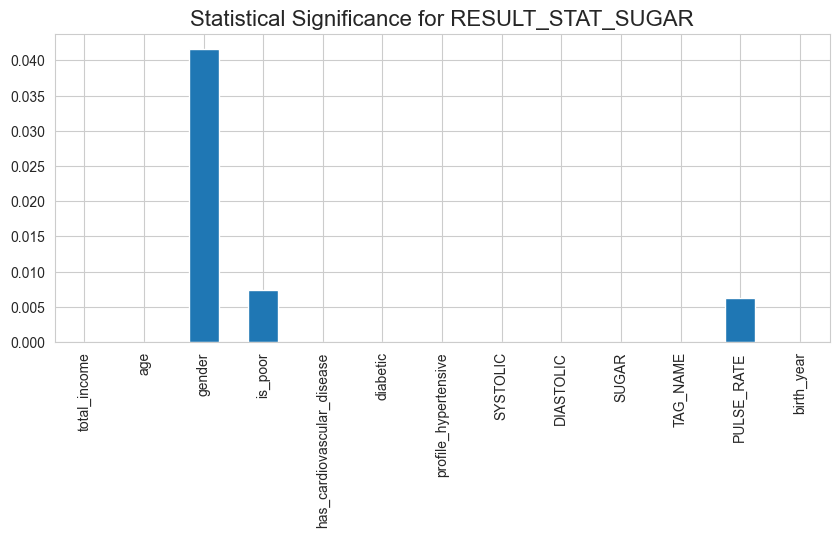

total_income             2.093522e-13
age                      1.582594e-19
gender                   4.231194e-37
is_poor                  2.744962e-04
profile_hypertensive     5.803369e-07
SYSTOLIC                 2.108282e-69
DIASTOLIC               3.722098e-173
RESULT_STAT_BP           4.541268e-30
PULSE_RATE               0.000000e+00
dtype: float64


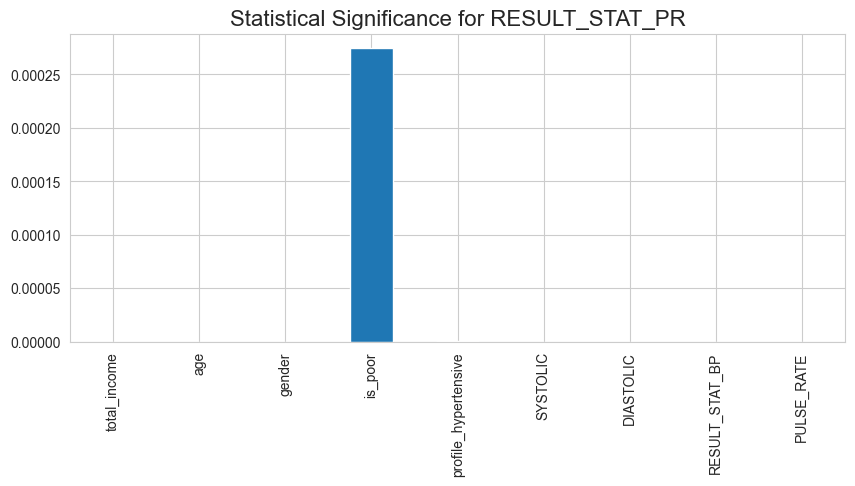

total_income       5.357951e-09
age               1.599379e-166
gender             2.431079e-02
is_poor            8.469935e-03
SYSTOLIC           7.475157e-05
RESULT_STAT_BP     4.559817e-02
WEIGHT             2.670527e-02
SPO2               1.026722e-86
birth_year         5.540018e-04
dtype: float64


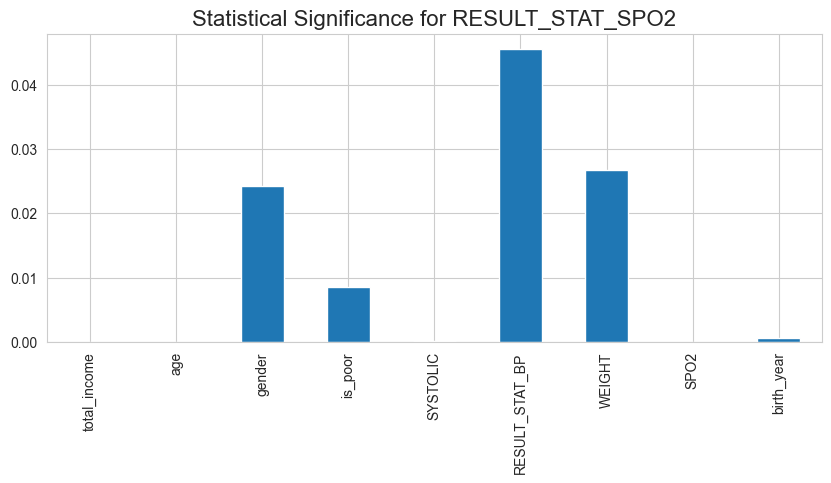

total_income     1.267794e-02
age             9.298710e-141
gender           2.463511e-03
HEIGHT           1.693013e-09
WEIGHT           3.928752e-08
birth_year       1.798195e-03
dtype: float64


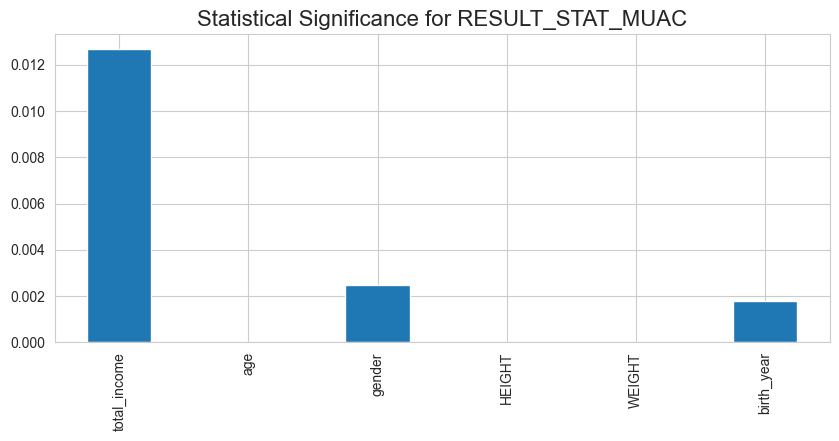

In [78]:
y_cols = ['RESULT_STAT_BMI','RESULT_STAT_SUGAR','RESULT_STAT_PR','RESULT_STAT_SPO2', 'RESULT_STAT_MUAC']

for i in y_cols:
    X = df.drop(i, axis=1)
    y = df[i]
    chi_val, p_val = chi2(X,y)
    
    p_index = []
    p_val_threshold = []
    alpha = 0.05    # threshold for null hypothesis -> 5%
    
    for j,k in enumerate(p_val):
        if k<=alpha:
            p_val_threshold.append(k)
            p_index.append(X.columns[j])

    p_val_series =  pd.Series(data=p_val_threshold, index=p_index)
    print(p_val_series)

    plt.figure(figsize=(10,4))
    ax = p_val_series.plot.bar()
    plt.title(f"Statistical Significance for {i}", fontsize=16)
    plt.show()

# Interpretation of p-values:

- p-value <= alpha: we reject the null hypothesis. This suggests that there is evidence to support the alternative hypothesis. In other words, the result is statistically significant.

- p-value > alpha: we fail to reject the null hypothesis. This means that the data does not provide strong enough evidence to support the alternative hypothesis. In other words, the result is not statistically significant.

### Manual method

In [79]:
X = df.drop('RESULT_STAT_SPO2', axis=1)
y = df['RESULT_STAT_SPO2']

In [80]:

chi_val, p_val = chi2(X,y)
print(chi_val, p_val)

[3.80893685e+01 7.63519020e+02 7.43367010e+00 9.54246498e+00
 1.81607419e-01 2.68463141e-01 8.84834114e-02 7.91348622e-01
 1.05731951e+00 1.90026808e+01 6.71203268e-01 6.17577518e+00
 4.99321198e+00 7.24578897e+00 5.95264032e-01 8.34613603e-02
 6.29681131e-02 3.85030612e-02 1.08430257e-01 1.86177710e+00
 2.46329068e+00 3.95991893e+02 1.74518729e-03 7.99768525e-03
 1.49966854e+01] [5.35795089e-009 1.59937933e-166 2.43107886e-002 8.46993463e-003
 9.13196945e-001 8.74387559e-001 9.56722684e-001 6.73225922e-001
 5.89394374e-001 7.47515675e-005 7.14907844e-001 4.55981747e-002
 8.23640693e-002 2.67052665e-002 7.42574545e-001 9.59128058e-001
 9.69006406e-001 9.80932597e-001 9.47228309e-001 3.94203284e-001
 2.91812053e-001 1.02672240e-086 9.99127787e-001 9.96009142e-001
 5.54001761e-004]


In [81]:
def p_vals(p_val):
    p_index = []
    p_val_threshold = []
    alpha = 0.05    # threshold for null hypothesis -> 5%
    
    for i,j in enumerate(p_val):
        if j<=alpha:
            return p_val_threshold.append(j), p_index.append(X.columns[i])



In [82]:
p_index = []
p_val_threshold = []
alpha = 0.05    # threshold for null hypothesis -> 5%

for i,j in enumerate(p_val):
    if j<=alpha:
        print(i,j)
        p_val_threshold.append(j)
        p_index.append(X.columns[i])


p_val_series =  pd.Series(data=p_val_threshold, index=p_index)

0 5.357950891431402e-09
1 1.5993793263328457e-166
2 0.024310788584712573
3 0.00846993462956955
9 7.475156745626988e-05
11 0.04559817473682024
13 0.02670526648842596
21 1.0267223951912472e-86
24 0.0005540017605428798


In [83]:
p_val_series

total_income       5.357951e-09
age               1.599379e-166
gender             2.431079e-02
is_poor            8.469935e-03
SYSTOLIC           7.475157e-05
RESULT_STAT_BP     4.559817e-02
WEIGHT             2.670527e-02
SPO2               1.026722e-86
birth_year         5.540018e-04
dtype: float64

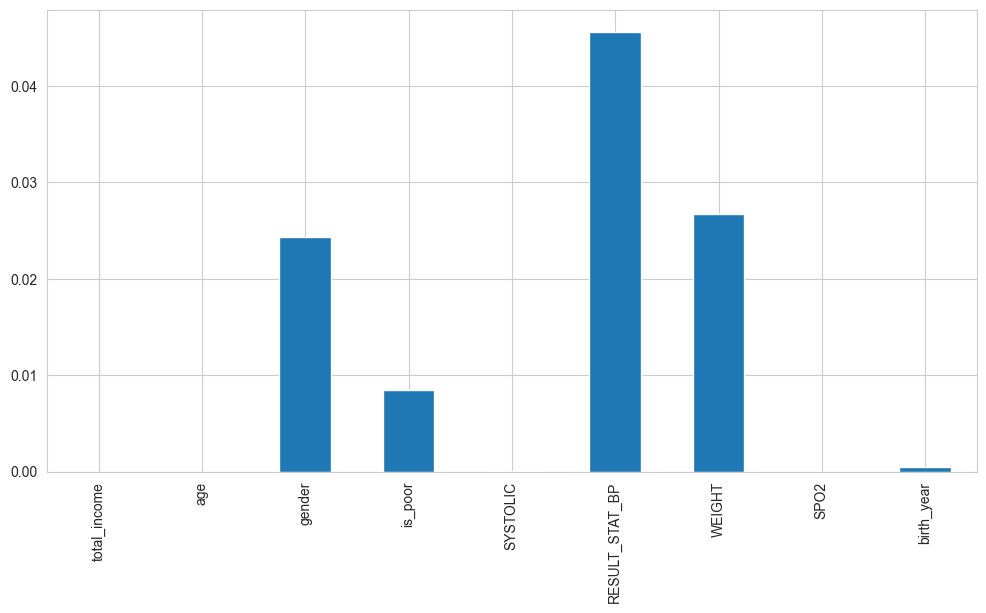

In [84]:
plt.figure(figsize=(12,6))
ax = p_val_series.plot.bar()
plt.show()